# Time Series

In [1]:
import pandas as pd
taiex=pd.read_csv('taiex.csv',sep='\t')

taiex.head(n=3)

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2014-01-02,8618.60,8632.81,8587.54,8612.54,4462792
1,1,2014-01-03,8584.74,8584.74,8537.86,8546.54,4406184
2,2,2014-01-06,8553.00,8568.24,8488.64,8500.01,4556810


In [2]:
#提取加權股價指數的收盤指數數據
Close=taiex['Close']
Close.head(n=3)

0    8612.54
1    8546.54
2    8500.01
Name: Close, dtype: float64

In [3]:
Close.index=pd.to_datetime(taiex['Date'])
Close.head()

Date
2014-01-02    8612.54
2014-01-03    8546.54
2014-01-06    8500.01
2014-01-07    8512.30
2014-01-08    8556.01
Name: Close, dtype: float64

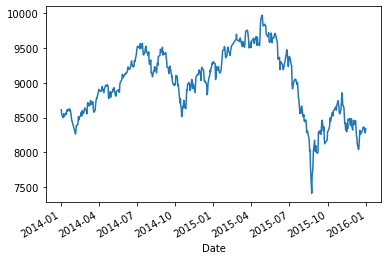

In [4]:
Close.plot()

In [6]:
#截取2015年10月8日到10月31日的數據
taiex.index = pd.to_datetime(taiex.Date)
taiex=taiex.iloc[:,1:]
taiexPart = taiex['2015-10-08':'2015-10-31']
taiexPart.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-10-08,8528.46,8544.93,8434.50,8445.96,4582747
2015-10-12,8478.34,8578.22,8478.34,8573.72,4663975
2015-10-13,8571.57,8574.11,8518.41,8567.92,4628841
2015-10-14,8545.14,8553.87,8515.53,8522.51,4661254
2015-10-15,8573.38,8652.47,8573.38,8601.52,4925269


In [7]:
#檢視後兩個交易數據
taiexPart.tail(n=2)

,Open,High,Low,Close,Volume
Date,,,,,
2015-10-29,8682.58,8704.59,8568.13,8571.08,4608149
2015-10-30,8578.25,8586.90,8503.69,8554.31,4366502


In [9]:
#截取2015年數據
taiex2015=taiex['2015']
#檢視2015年前2期交易數據
taiex2015.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-05,9292.31,9292.31,9182.02,9274.11,4852267
2015-01-06,9209.93,9209.93,9043.44,9048.34,6230285
2015-01-07,9051.94,9108.66,9050.54,9080.09,5479103
2015-01-08,9154.03,9246.62,9154.03,9238.03,6379855
2015-01-09,9247.40,9284.57,9215.58,9215.58,5433889


In [10]:
taiexAfter2015=taiex['2015':]
taiexAfter2015.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-05,9292.31,9292.31,9182.02,9274.11,4852267
2015-01-06,9209.93,9209.93,9043.44,9048.34,6230285
2015-01-07,9051.94,9108.66,9050.54,9080.09,5479103
2015-01-08,9154.03,9246.62,9154.03,9238.03,6379855
2015-01-09,9247.40,9284.57,9215.58,9215.58,5433889


In [11]:
taiexBefore2015=taiex[:'2015-01-01']
taiexBefore2015.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2014-12-26,9171.91,9214.07,9158.39,9214.07,3968724
2014-12-27,9222.47,9228.65,9197.13,9218.50,3132975
2014-12-29,9216.43,9313.33,9216.43,9286.28,4867306
2014-12-30,9299.10,9338.06,9262.70,9268.43,4315769
2014-12-31,9260.46,9307.26,9252.31,9307.26,3476527


In [13]:
#選取2014年9月到年底的數據
taiex9End=taiex['2014-09':'2014']
taiex9End.tail(n=2)

,Open,High,Low,Close,Volume
Date,,,,,
2014-12-30,9299.10,9338.06,9262.70,9268.43,4315769
2014-12-31,9260.46,9307.26,9252.31,9307.26,3476527


In [14]:
Close.describe()

count     492.000000
mean     8975.810467
std       476.946252
min      7410.340000
25%      8599.502500
50%      9002.190000
75%      9370.940000
max      9973.120000
Name: Close, dtype: float64

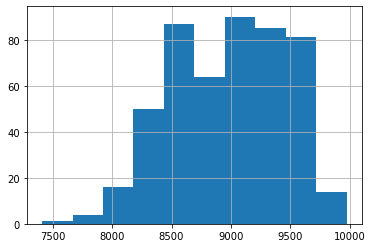

In [15]:
Close.hist()

# ADF Test & KPSS Test  
ADF test: https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/?fbclid=IwAR0Ue0OJCRrseqU0UzUsvihhQ5kynZDKm6i9uvposDXHHaFf4kKnSBMKOhs  
KPSS test: https://www.machinelearningplus.com/time-series/kpss-test-for-stationarity/  

In [3]:
from statsmodels.tsa.stattools import adfuller, kpss
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
#print(df.head())
# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.1451856893067296
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476

KPSS Statistic: 1.313675
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\user\anaconda3\envs\demo_env\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


# Autocovariance

In [1]:
import pandas as pd
from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import *
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
from arch.unitroot import ADF

#讀取資料
taiex = pd.read_csv('taiex.csv',sep='\t')
taiex.index=pd.to_datetime(taiex.Date)
close=taiex['Close']

In [2]:
taiexRet = (close-close.shift(1))/close
taiexRet=taiexRet.dropna()
taiexRet.head()

Date
2014-01-03   -0.007722
2014-01-06   -0.005474
2014-01-07    0.001444
2014-01-08    0.005109
2014-01-09   -0.004854
Name: Close, dtype: float64

In [3]:
#計算自相關係數
acfs=stattools.acf(taiexRet)
acfs[:5]

C:\Users\user\anaconda3\envs\demo_env\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.        ,  0.04331678, -0.03590232,  0.05274551, -0.0692361 ])

In [4]:
#計算偏自相關係數
pacfs=stattools.pacf(taiexRet)
pacfs[:5]

array([ 1.        ,  0.04340518, -0.03800477,  0.05653156, -0.076725  ])

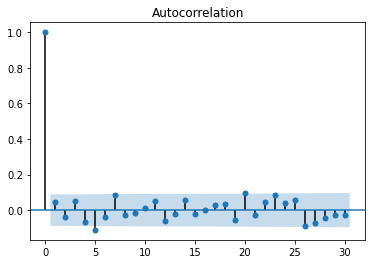

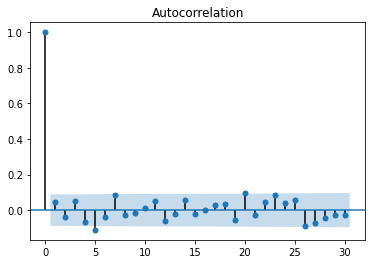

In [5]:
#繪制自相關係數圖
from statsmodels.graphics.tsaplots import *
plot_acf(taiexRet,use_vlines=True,lags=30)

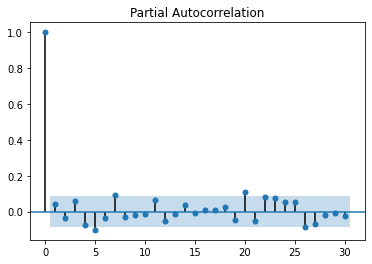

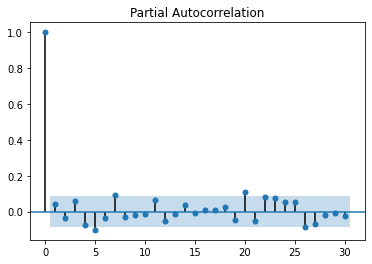

In [6]:
plot_pacf(taiexRet,use_vlines=True,lags=30)


Text(0.5, 1.0, '2014-2015')

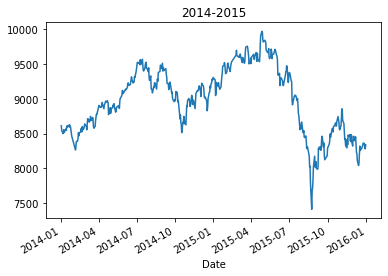

In [7]:
close.plot()
plt.title('2014-2015')

Text(0.5, 1.0, '2014-2015 return')

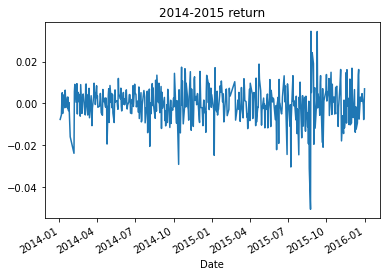

In [8]:
taiexRet.plot()
plt.title('2014-2015 return')

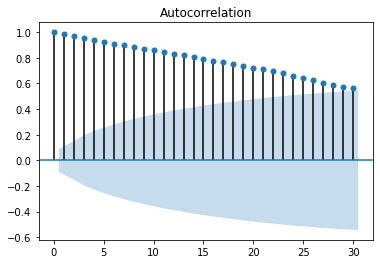

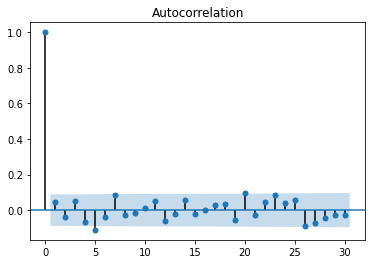

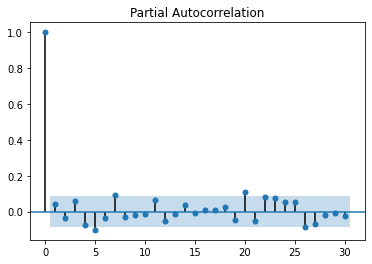

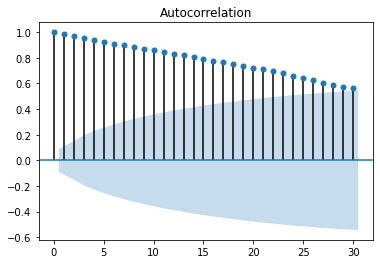

In [27]:
plot_acf(taiexRet,use_vlines=True,lags=30)
plot_pacf(taiexRet,use_vlines=True,lags=30)
plot_acf(close,use_vlines=True,lags=30)



# AR  
pip install statsmodels  
ref:https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AutoReg.html

In [3]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


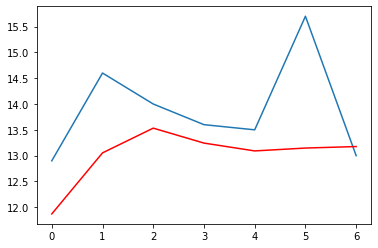

In [7]:
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# MA

In [5]:
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]

#print(data)
# fit model
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[75.11099426]


# ARMA

In [2]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
data = [random() for x in range(1, 100)]
# fit model
model = ARMA(data, order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[0.63238723]


# ARIMA

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


C:\Users\user\anaconda3\envs\demo_env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


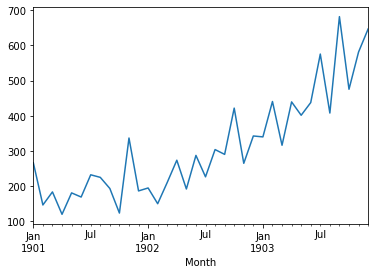

In [7]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

C:\Users\user\anaconda3\envs\demo_env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


predicted=349.117734, expected=342.300000
predicted=306.513002, expected=339.700000
predicted=387.376436, expected=440.400000
predicted=348.154209, expected=315.900000
predicted=386.308798, expected=439.300000
predicted=356.082063, expected=401.300000
predicted=446.379484, expected=437.400000
predicted=394.737309, expected=575.500000
predicted=434.915469, expected=407.600000
predicted=507.923369, expected=682.000000
predicted=435.482710, expected=475.300000
predicted=652.743868, expected=581.300000
predicted=546.343505, expected=646.900000
Test MSE: 6958.328


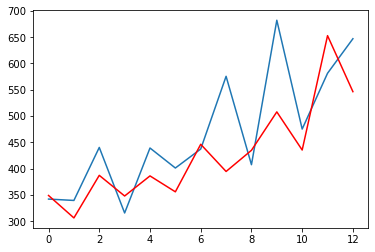

In [8]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# Example

In [4]:
import pandas as pd
df = pd.read_csv('international-airline-passengers.csv',header=None)
df.columns = ['year','passengers']
df.head()

,year,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.describe()

,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
print('Time period start: {}\nTime period end: {}'.format(df.year.min(),df.year.max()))

Time period start: 1949-01
Time period end: 1960-12


In [7]:
df.shape

(144, 2)

In [8]:
df['year'] = pd.to_datetime(df['year'], format='%Y-%m')
y = df.set_index('year')
y.head()

,passengers
year,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


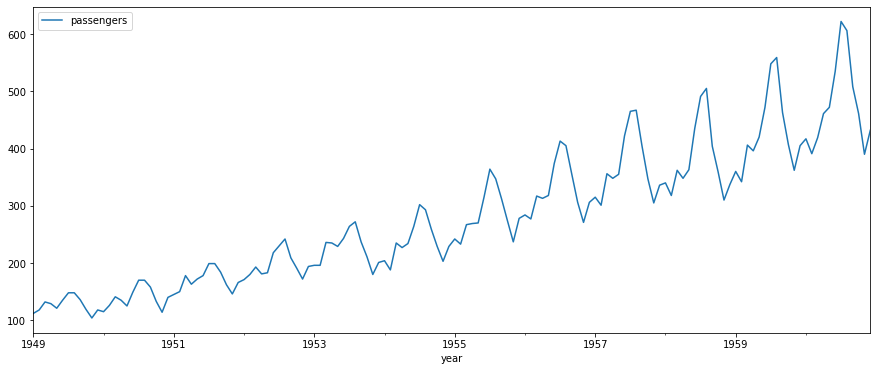

In [9]:
y.plot(figsize=(15, 6))
plt.show()

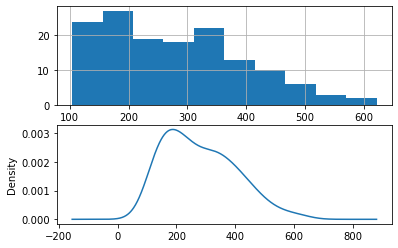

In [10]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
y['passengers'].hist()
pyplot.subplot(212)
y['passengers'].plot(kind='kde')
pyplot.show()

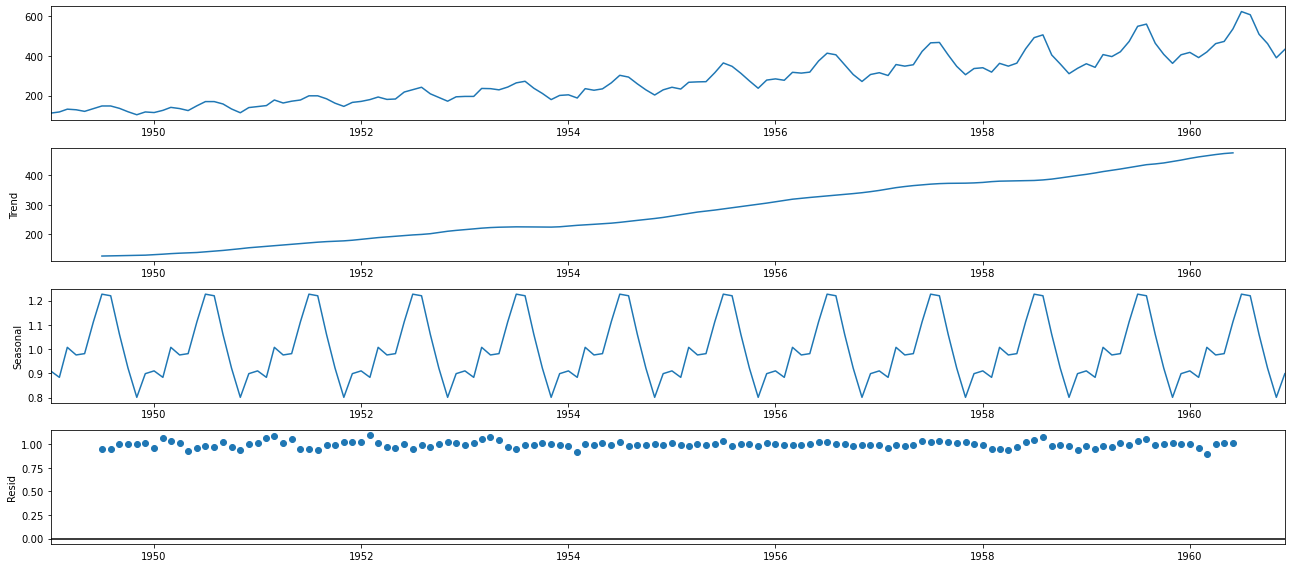

In [12]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
plt.show()

#  check stationarity using the following  
- __ACF and PACF plots__: If the time series is stationary, the ACF/PACF plots will show a __quick drop-off in correlation__ after a small amount of lag between points.
- __Plotting Rolling Statistics__: We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.
- __Augmented Dickey-Fuller Test:__ This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.

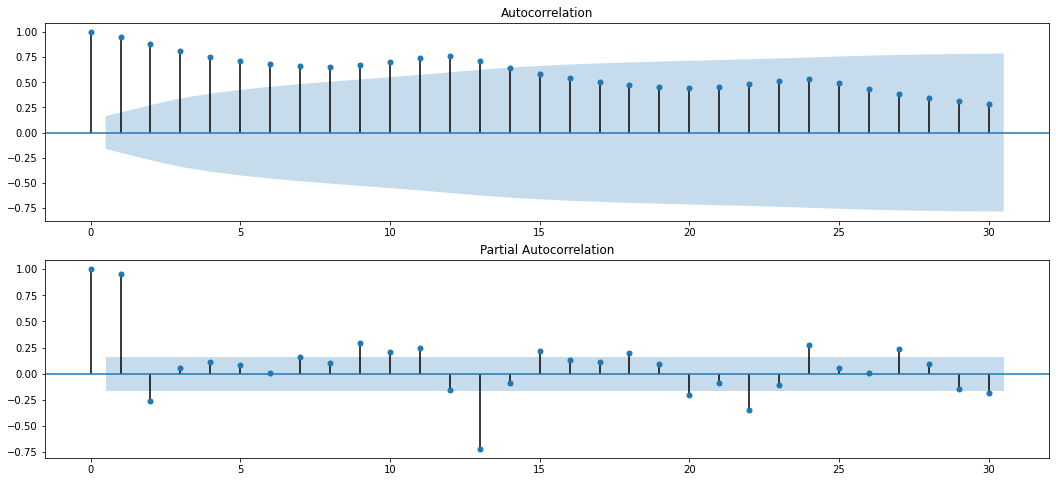

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# plot acf and pacf
pyplot.figure()
pyplot.subplot(211)
plot_acf(y.passengers, ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(y.passengers, ax=pyplot.gca(), lags = 30)
pyplot.show()

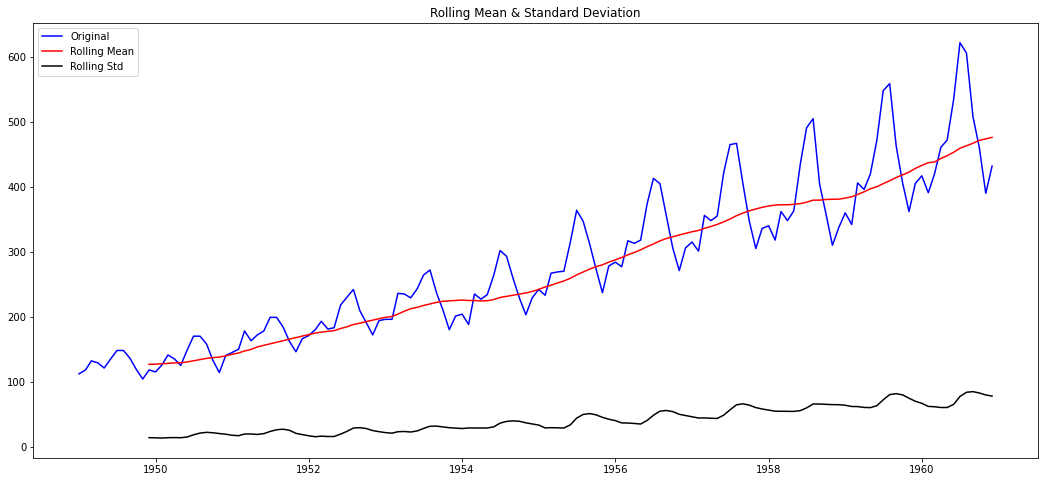

In [17]:
# plot rolling statistics
import pandas as pd
rolmean = y.rolling(12).mean()
rolstd = y.rolling(12).std()

#Plot rolling statistics:
orig = plt.plot(y, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [18]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(y.passengers, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [23]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

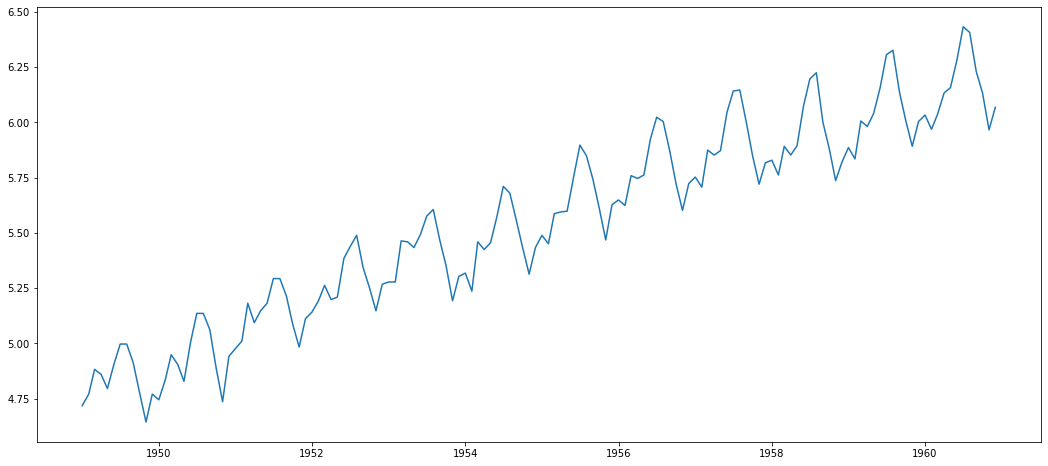

In [20]:
ts_log = np.log(y)
plt.plot(ts_log)

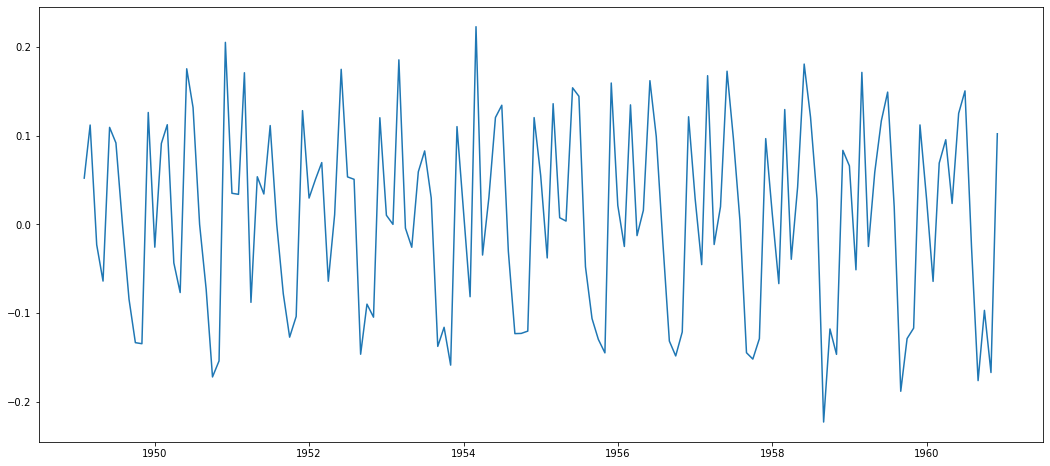

In [21]:
ts_log_diff = ts_log['passengers'] - ts_log['passengers'].shift()
plt.plot(ts_log_diff)

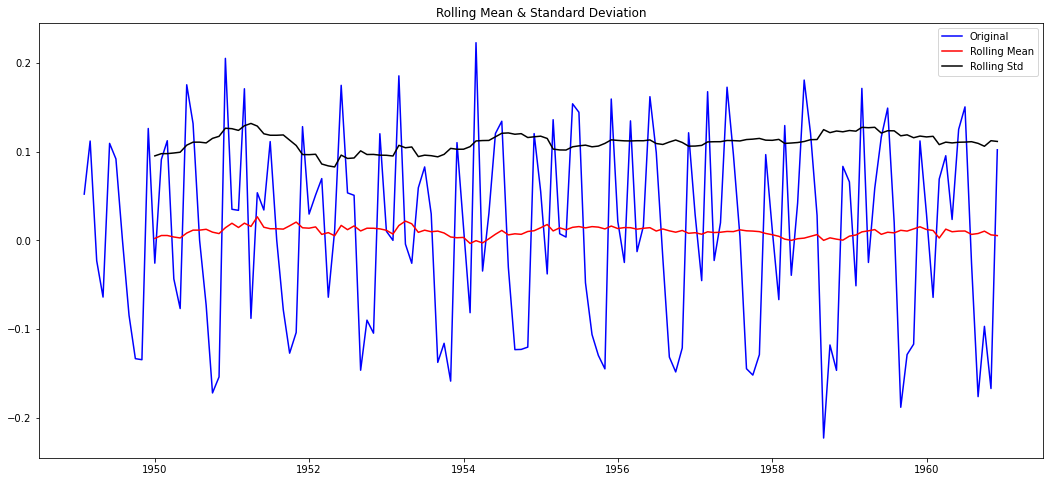

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [24]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

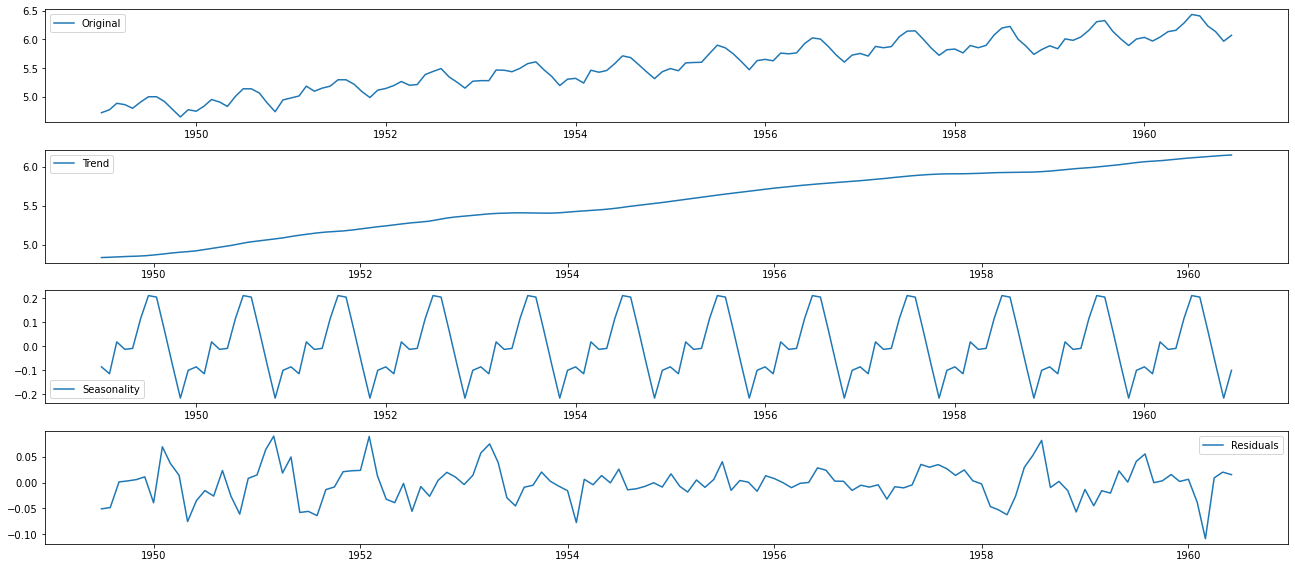

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

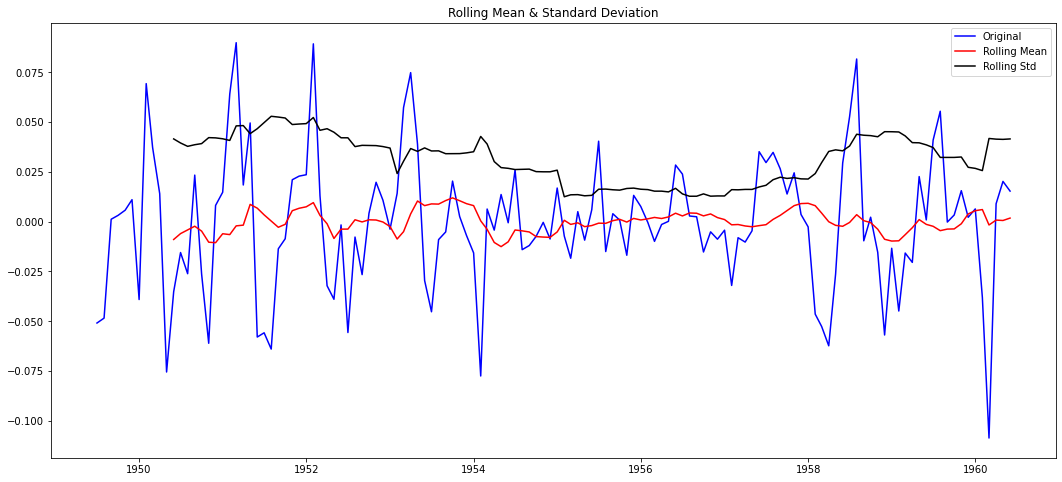

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [27]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

C:\Users\user\anaconda3\envs\demo_env\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, Futur

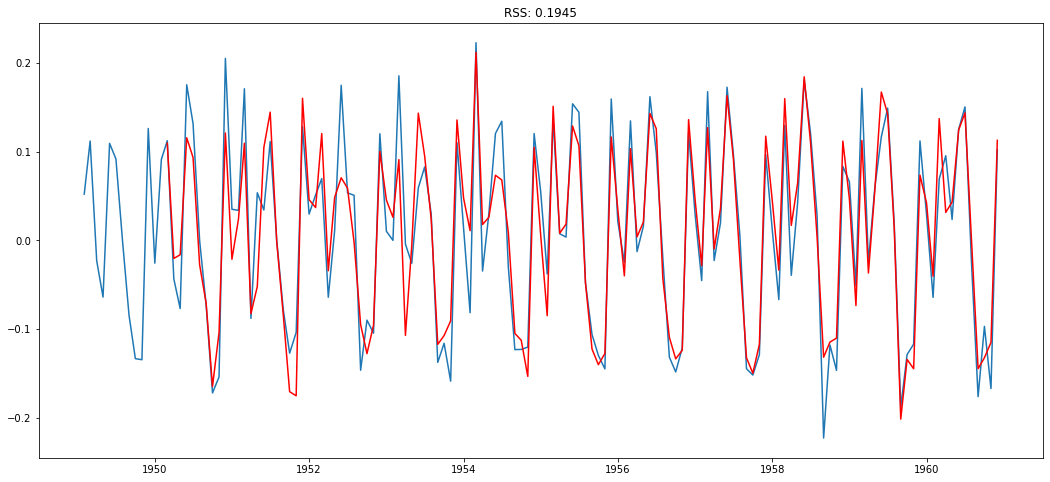

In [28]:
# Use AR to model 
from statsmodels.tsa.ar_model import AR
from random import random

model = AR(ts_log_diff)
model_fit = model.fit()

plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))
plt.show()

In [29]:
predictions_ARIMA_diff = pd.Series(model_fit.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

year
1950-03-01    0.109713
1950-04-01   -0.020423
1950-05-01   -0.016243
1950-06-01    0.115842
1950-07-01    0.093564
dtype: float64


In [30]:
# Cumulative Sum to reverse differencing
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

year
1950-03-01    0.109713
1950-04-01    0.089291
1950-05-01    0.073048
1950-06-01    0.188891
1950-07-01    0.282455
dtype: float64


In [31]:
# Adding 1st month value which was previously removed while differencing
predictions_ARIMA_log = pd.Series(ts_log.passengers.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

year
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
dtype: float64

In [32]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

Text(0.5, 1.0, 'RMSE: 78.5144')

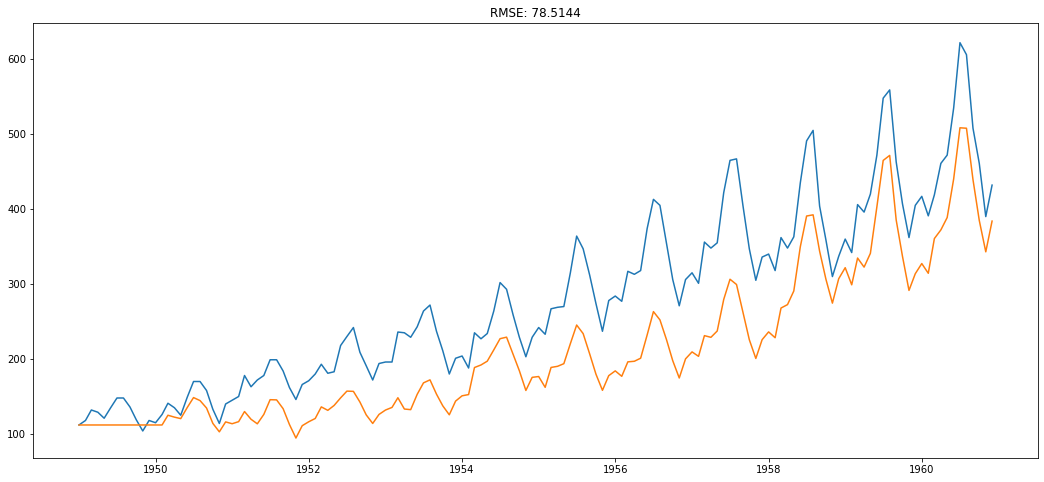

In [33]:
plt.plot(y.passengers)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(np.nansum((predictions_ARIMA-y.passengers)**2)/len(y.passengers)))

In [34]:
from sklearn.metrics import r2_score
r2_score(y.passengers, predictions_ARIMA)

0.5686734896130742

# ML model and Time Series

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

df = pd.read_csv('./stock_apple.csv')

df['Yes Adj Close'] = df['Adj Close'].shift(-1)
df['Yes Volume'] = df['Volume'].shift(-1)
df['Gain'] = df['Adj Close'] - df['Yes Adj Close'] 
df['Up'] = df['Gain'].apply(lambda x: 1 if x> 0 else 0) 

print(df.head())

df = df.dropna()
## reset index
df = df.reset_index(drop=True)

print(df.head())

df_normal = pd.DataFrame()
df_normal['volume_ratio'] = df['Volume'].apply(pd.to_numeric)  / df['Yes Volume'].apply(pd.to_numeric) 
df_normal['close_price_ratio'] = df['Adj Close'].apply(pd.to_numeric) / df['Yes Adj Close'].apply(pd.to_numeric)

df_normal['target'] = df['Up'].shift(1)

df_normal = df_normal.dropna()
## reset index
df_normal = df_normal.reset_index(drop=True)


#print(df_normal.head())

X=df_normal[['volume_ratio', 'close_price_ratio']]
y=df_normal['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) #random_state 種子值

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = SVC(kernel='rbf', C=10)
model.fit(X_train, y_train) 

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('confusion matrix: {}'.format(con_matrix))



         Date        Open        High          Low        Close    Adj Close  \
0  2018-04-30  1030.01001  1037.00000  1016.849976  1017.330017  1017.330017   
1  2018-04-27  1046.00000  1049.50000  1025.589966  1030.050049  1030.050049   
2  2018-04-26  1029.51001  1047.97998  1018.190002  1040.040039  1040.040039   
3  2018-04-25  1025.52002  1032.48999  1015.309998  1021.179993  1021.179993   
4  2018-04-24  1052.00000  1057.00000  1010.590027  1019.979980  1019.979980   

    Volume  Yes Adj Close  Yes Volume       Gain  Up  
0  1664113    1030.050049   1611500.0 -12.720032   0  
1  1611500    1040.040039   2079500.0  -9.989990   0  
2  2079500    1021.179993   2391100.0  18.860046   1  
3  2391100    1019.979980   4760300.0   1.200013   1  
4  4760300    1067.449951   2341300.0 -47.469971   0  
         Date        Open        High          Low        Close    Adj Close  \
0  2018-04-30  1030.01001  1037.00000  1016.849976  1017.330017  1017.330017   
1  2018-04-27  1046.00000  10